#1.Load The Dataset

In [2]:
import pandas as pd
original_df = pd.read_csv("Pokemon.csv")
original_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


# 2.Select The Features

In [3]:
modified_df = original_df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
modified_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


# 3.Slit into 3 Partitions: Train, Val and Test

In [5]:
shuffled_df = modified_df.sample(frac=1) #va tirer un échantillon représentant 100% des lignes du DataFrame modified_df, mais dans un ordre aléatoire.
shuffled_df

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
648,55,75,60,75,60,103
361,80,100,80,80,80,100
555,60,60,75,60,75,83
616,105,30,105,140,105,55
259,45,75,37,70,55,83
...,...,...,...,...,...,...
212,95,65,110,60,130,65
406,45,75,60,40,30,50
777,57,80,91,80,87,75
311,60,60,60,35,35,30


In [10]:
train_df = shuffled_df[:500] # 500 valeurs du Dataset
val_df = shuffled_df[500:650] # 150 valeurs du Dataset
test_df = shuffled_df[650:] # 150 valeurs du Dataset
len(train_df), len(val_df), len(test_df)

(500, 150, 150)

In [13]:
#(Slicing NumPy) : Convertit le DataFrame train_df en un tableau NumPy (type numpy.ndarray).
#  : (sans indices) = toutes les lignes.
#  :-1 = toutes les colonnes sauf la dernière = 0:len(colonnes)-1

X_train , Y_train = train_df.to_numpy()[:,:-1] , train_df.to_numpy()[:,-1]
X_val , Y_val = val_df.to_numpy()[:,:-1] , val_df.to_numpy()[:,-1]
X_test , Y_test = test_df.to_numpy()[:,:-1] , test_df.to_numpy()[:,-1]

(X_train.shape , Y_train.shape) , (X_val.shape , Y_val.shape) , (X_test.shape , Y_test.shape)


(((500, 5), (500,)), ((150, 5), (150,)), ((150, 5), (150,)))

#4.Preprocess Inputs

$$
x' = \frac{x - \min(X)}{\max(X) - \min(X)}
$$

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: >]], dtype=object)

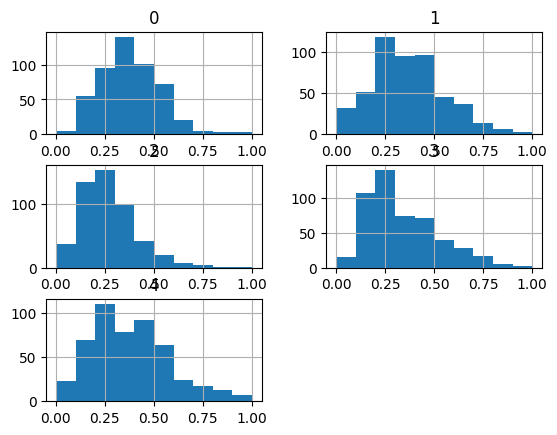

In [18]:
# MinMaxScaler : Normalise les données pour les ramener dans un intervalle fixe (par défaut [0, 1])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)


X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

pd.DataFrame(X_train_scaled).hist() #Les valeurs sont entre 0 et 1 (Normalisée)

#5.Pick The Best Modele W/Lowest Validation Error

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

linear_model = LinearRegression().fit(X_train_scaled,Y_train)

mean_absolute_error(Y_val,linear_model.predict(X_val_scaled))



17.201310492497978

In [30]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor().fit(X_train_scaled,Y_train)

mean_absolute_error(Y_val,random_forest_model.predict(X_val_scaled))

17.842879999999997